   # Advanced Twitter Sentiment Classification Solution

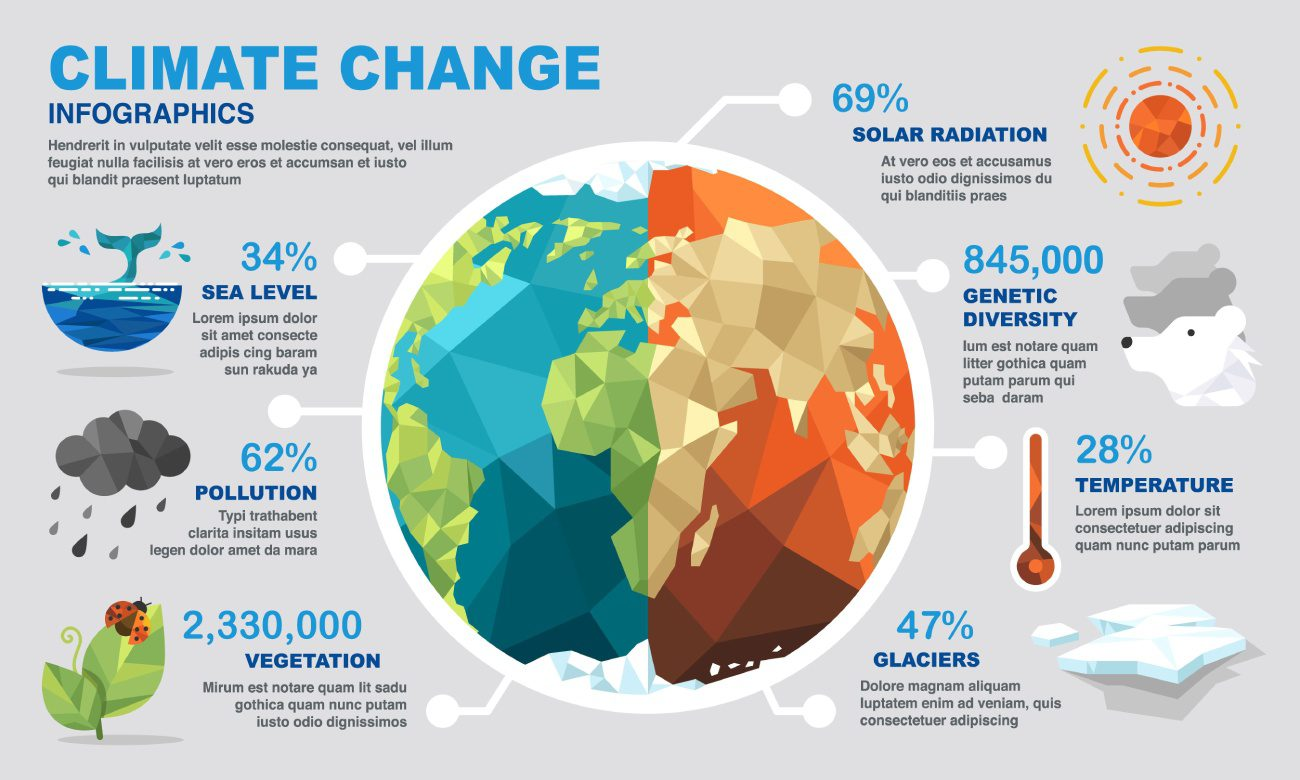

# 1. INTRODUCTION
## 1.1 RR10 PRIME TECH CONSULT

RR10 Prime Tech Consult provides data and analytics solutions that enable clients to gain valuable insights from their data, make informed decisions in a timely manner, and consistently stay ahead of the competition.
    

## 1.2 Project Summary
Numerous companies are established with the aim of reducing negative environmental impact especially those that lead to  
execess carbon emission. These companies provide eco-friendly and sustainable products and services that align with their 
core values and principles. They are interested in assessing public perceptions of climate change and determining whether 
it is regarded as a genuine threat. Such insights would contribute to their market research endeavors by providing an 
understanding of how their products or services might be received.

## 1.3 Problem Statement
Presently, climate change represents a global threat that significantly impacts our society. However, a concerning issue 
arises in the form of a discrepancy between authentic scientific discoveries regarding the true nature of climate change 
and the manipulation of climate change narratives by politicians for their own opportunistic gains. Consequently, a 
profound division emerges among individuals, both offline and online platforms like Twitter, regarding their interpretations 
of climate change. This situation places commercial organizations, regardless of their size, in a precarious position as they 
strive to determine the most appropriate stance to adopt—whether it be opposing, supporting, or remaining neutral toward 
climate change. As a response to this challenge, the focus of this project centers around the development of climate change 
classifier models. These models utilize a vast dataset consisting of thousands of tweets to predict the sentiment of Twitter 
users towards climate change.

## 1.4 Source of Data
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. 
The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 
tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### 1.4.1 Class Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions
    
### 1.4.2 Features

sentiment: Which class a tweet belongs in (refer to Class Description above)

message: Tweet body

tweetid: Twitter unique id
    
## 1.5 Aim and specific objectives

### 1.5.1 Aim
The primary aim of this undertaking was to construct a range of classifier models with the ability to forecast the 
sentiment expressed by Twitter users concerning climate change, achieving an accuracy level between 70% and 80%. 

### 1.5.2 Specific objectives
The specific objectives were to:
    
1. Quantify the volume of messages within each sentiment category (Anti, Neutral, Pro, News)
2. Evaluate the top 10 hashtags predominantly associated with each sentiment category
3. Analyze word clouds for each sentiment category
4. Create five classifier models that could effectively predict the sentiment related to climate change, utilizing the 
   F1-score as the evaluation metric.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>
    
<a href=#five>5. Data pre-processing</a>

<a href=#six>6. Data Engineering</a>

<a href=#seven>7. Modeling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Model Explanations</a>

<a href=#ten>10. Conclusion</a>
    
<a href=#eleven>11. Kaggle Model Submissions</a>
    
<a href=#twelve>12. References</a>
     

 <a id="one"></a>
## 2. Importing Packages

---
-  The following libraries among others were imported and used in the course of this project:

     **Pandas**: Used primarily for dataframe and also for data manipulation and normalization.
     
     **Numpy**: Used for mathematical computations on the data.
     
     **Matplotlib**: Used for data visualization.
     
     **Seaborn**: Built upon matplotlib; used for more customizable data visualizations.
     
     **NLTK**: A leading library for building Python programs to work with human language data providing easy-to-use interfaces
     
     **Sklearn**: Used for Machine learning operations - it is a library that contains efficient tools for machine learning       and statistical modeling as well as data preprocessing and model building.
---

In [1]:
''' Libraries for data loading, data manipulation and data visulisation '''

# for data manipulation and datafram
import numpy as np
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # set plot style

# for text processing and manipulation
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# for creating pickles for the Streamlit app
import pickle

# for preprocessing characters and words
import string
from string import printable
from spellchecker import SpellChecker
import re # to check if a particular string matches a given regular expression
import urllib # to fetch URLs

# for data balancing 
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# libraries for different models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# tools for preprocessing the data for predictive analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, tree, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


# ignore warning 
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## 3. Loading the Data

In [2]:
# Loading the train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) plays a crucial role in data science for several reasons.

Understanding the data: EDA helps data scientists gain an initial understanding of the dataset they are working with. By examining the structure, distribution, and characteristics of the data, they can identify patterns, trends, outliers, and potential issues.

Data preprocessing: EDA helps in data preprocessing tasks, such as data cleaning, missing value imputation, and handling outliers. By visualizing and exploring the data, data scientists can make informed decisions on how to treat missing values, handle outliers, or deal with other data quality problems.

Feature selection: EDA helps in identifying important features or variables that are most relevant to the problem at hand. By analyzing the relationships between different variables, data scientists can determine which variables are useful for modeling and which can be disregarded. The following will be carried out:
1. we will view the data
2. we would check the distibution of data across the target class- "sentiment".
3. check the top words used in the dataset in relatation to each class of sentiment.
4. check influence of mentions on the target feature.
5. check influence hashtags have on the target feature etc

In [3]:
# viewing the head of the sample from the train data
train.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [4]:
# viewing the tail of the sample from the train data
train.tail()

,sentiment,message,tweetid
30754,2,RT @TIME: The Pentagon warned that climate cha...,958155326259367937
30755,2,Study finds that global warming exacerbates re...,956048238615900163
30756,2,RT @MikeySlezak: The global green movement pre...,800258621485391872
30757,2,RT @ProfEdwardsNZ: NYC Mayor says NY will go f...,871365767895404545
30758,2,RT Sanders: Climate Change Causes Terrorism h...,666236638155141121


In [5]:
# viewing the head of the sample from the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
# viewing the tail of the sample from the test data
test.tail()

,message,tweetid
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455
10545,RT @chloebalaoing: climate change is a global ...,470892


In [7]:
## checking the shape of the dataset
print('Train dataset shape is: ', train.shape)
print('Test dataset shape is: ', test.shape)

Train dataset shape is:  (30759, 3)
Test dataset shape is:  (10546, 2)


In [8]:
## checking the datatype of the features in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


In [9]:
## checking the datatype of the features in the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [10]:
# check how many class is in the target feature
sentiment_class = list(train.sentiment.unique())
print (sentiment_class)

[-1, 0, 1, 2]


In [11]:
#check the distribution of data across the classes of the target variable
train['sentiment'].value_counts()

 1    16073
 2     6493
 0     5400
-1     2793
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Class Distribution')

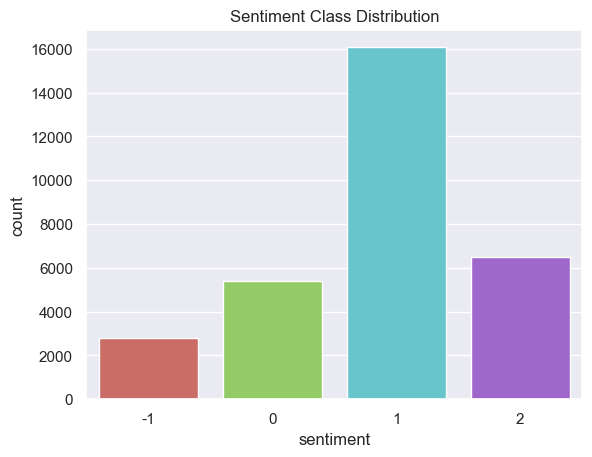

In [12]:
# graphical representaion of class distribution 
sns.countplot(x = 'sentiment', data = train, palette="hls")
plt.title("Sentiment Class Distribution")

##### Observation
The distribution of data across class is imbalance; in a dataset with 4 classes (1,2,0 and -1),the class 1 occupies more than 50% of the dataset, while class -1 occupies less than 10% of the dataset. Class imbalance is something that can greatly affect the performance of models, therefore, it has to be fixed.

In [13]:
##check for null values in the train dataset
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [14]:
##check for null values in the train dataset
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [15]:
train['tweetid'].value_counts()

897853122080407553    1
860404952740528128    1
956582766694600704    1
958628132361302016    1
806328810459131904    1
                     ..
687117513331732481    1
955768079337877504    1
796334335293095941    1
864696629542010880    1
666236638155141121    1
Name: tweetid, Length: 30759, dtype: int64

The train dataset contains insufficient data features, making it challenging to gain meaningful insights into the presented data for the project. To overcome this limitation, the next step is to de-sample the message feature and transform it into numerical features. This will enable the utilization of numerical data for both graphical and non-graphical exploratory data analysis (EDA) and facilitate a better understanding of the relationships between the target variable and the tweet messages.

To create numerical features, several functions were developed to extract valuable insights from the message feature. These functions aided in performing descriptive statistics on the data and generating meaningful graphs.


#### Creating a column for the number of words

In [16]:
# adding a column of the count of number of words in the tweets
def add_num_of_words(df):
    
    # Create a new column named 'num_of_words'
    df['num_of_words'] = 0

    # Iterate over the rows in the dataframe
    for i, row in df.iterrows():
        # Split the message column into a list of words
        words = row['message'].split()

        # Count the number of words in the list and store the value in the new column
        num_of_words = len(words)
        df.loc[i, 'num_of_words'] = num_of_words

    return df

train = add_num_of_words(train)

In [17]:
train.head(5)

,sentiment,message,tweetid,num_of_words
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,21
1,-1,All the biggest lies about climate change and ...,925046776553529344,16
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,17
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,21
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,19


Having successfully added the column representing the count of number of words in each tweet, the subsequent step is to create a new column that counts the number of characters in each tweet. This additional column will provide valuable information about the length and complexity of the tweets.

#### Creating a number of characters in the tweets

In [18]:
# adding a column of the count of number of characters in the tweets
def add_char(df):
    df['num_of_char'] = df['message'].apply(lambda x : len(x))
    return df

train = add_char(train)

In [19]:
train.head(5)

,sentiment,message,tweetid,num_of_words,num_of_char
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,21,135
1,-1,All the biggest lies about climate change and ...,925046776553529344,16,122
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,17,141
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,21,140
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,19,128


- After successfully adding the column representing the count of the number of characters in each tweet, the next step is to create a new column that contains the count of stopwords. This additional column will capture the frequency of commonly used words that typically do not carry significant meaning in the context of the tweets, allowing for further analysis and exploration of the data.

#### Creating column for number of stopwords

In [20]:
# adding a column of the count of stopwords in the tweets
def count_stopwords(df):
    df['stopwords'] = df['message'].apply(lambda x: len([w for w in x.split() if w.lower() in stopwords.words('english')]))
    return df

train = count_stopwords(train)

In [21]:
train.head(5)

,sentiment,message,tweetid,num_of_words,num_of_char,stopwords
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,21,135,5
1,-1,All the biggest lies about climate change and ...,925046776553529344,16,122,5
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,17,141,3
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,21,140,5
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,19,128,8


After successfully adding the column representing the count of stopwords in each tweet, the next step is to create new columns that contain the count of punctuations. These additional columns will provide insights into the usage of punctuation marks in the tweets, allowing for a more comprehensive analysis of the textual data.

#### Creating column for number of punctuations

In [22]:
# adding a column of the count of number of punctuations in the tweets
def add_punc_col(df):
    punc_list = string.punctuation
    df['punctuations'] = df['message'].apply(lambda x: sum([1 for i in x if i in punc_list]))
    return df
  
train = add_punc_col(train)

In [23]:
train.head(5)

,sentiment,message,tweetid,num_of_words,num_of_char,stopwords,punctuations
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,21,135,5,7
1,-1,All the biggest lies about climate change and ...,925046776553529344,16,122,5,5
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,17,141,3,15
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,21,140,5,13
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,19,128,8,9


#### Descriptive statistices

In [24]:
# checking the discriptive statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,30759.0,8.539289e-01,8.535507e-01,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
tweetid,30759.0,8.364330e+17,8.519986e+16,5.926334e+17,7.970301e+17,8.401516e+17,8.996975e+17,9.666876e+17
num_of_words,30759.0,1.738402e+01,4.625278e+00,1.000000e+00,1.400000e+01,1.800000e+01,2.100000e+01,9.700000e+01
num_of_char,30759.0,1.227177e+02,2.480514e+01,7.000000e+00,1.110000e+02,1.330000e+02,1.400000e+02,6.230000e+02
stopwords,30759.0,4.958191e+00,2.883188e+00,0.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,1.800000e+01
punctuations,30759.0,7.664326e+00,3.549906e+00,0.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,5.800000e+01


We also calculated additional statistical measures such as kurtosis and skewness for the data. In data science, kurtosis measures the presence of outliers in the data. A high kurtosis (>3) indicates a significant number of outliers, while a low kurtosis (<3) suggests a lack of outliers. On the other hand, skewness indicates the symmetry of the data distribution.

Here is a table that describes the range of skewness values:


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 


#### Outlier Detection

In [25]:
# checking for any outliers
train.kurtosis()

sentiment      -0.116253
tweetid         0.163476
num_of_words    2.636215
num_of_char     6.775979
stopwords      -0.277323
punctuations    1.790887
dtype: float64

In [26]:
# checking the skewness of data
train.skew()

sentiment      -0.592675
tweetid        -0.569575
num_of_words   -0.234833
num_of_char    -1.033877
stopwords       0.470582
punctuations    0.527544
dtype: float64

The analysis indicates that there are no outliers in all numerical features, except for the punctuations feature.

Upon examining the data distribution, the tweetid, num_of_words, stopwords, and punctuations features demonstrate a fairly symmetrical distribution. However, the sentiment feature exhibits a moderate negative skew, while the num_of_char feature displays both high negative and high positive skew.

Having completed the non-graphical univariate analysis, the most effective way to consolidate these findings is by creating visualizations for the data. Visual representations will enhance understanding of the data distributions and behaviors, providing valuable insights.

#### Univariate Analysis (Graphical)

Various plots can be used to examine the distribution of numerical features. Some commonly used plots include:

Histogram
Density plot
Box plot
Violin plot
In this project, the chosen visualizations were the histogram, box plots, and bar plots. The Matplotlib library was utilized to display both the histogram and bar plots simultaneously. Additionally, the Seaborn library was employed to present the box plots individually.

Histograms are effective for identifying key statistical measures such as the minimum and maximum data points, as well as the median. On the other hand, box plots provide a visual summary of the data, allowing researchers to quickly identify the mean values, dispersion of the dataset, and indications of skewness.

#### Histrogram Plots

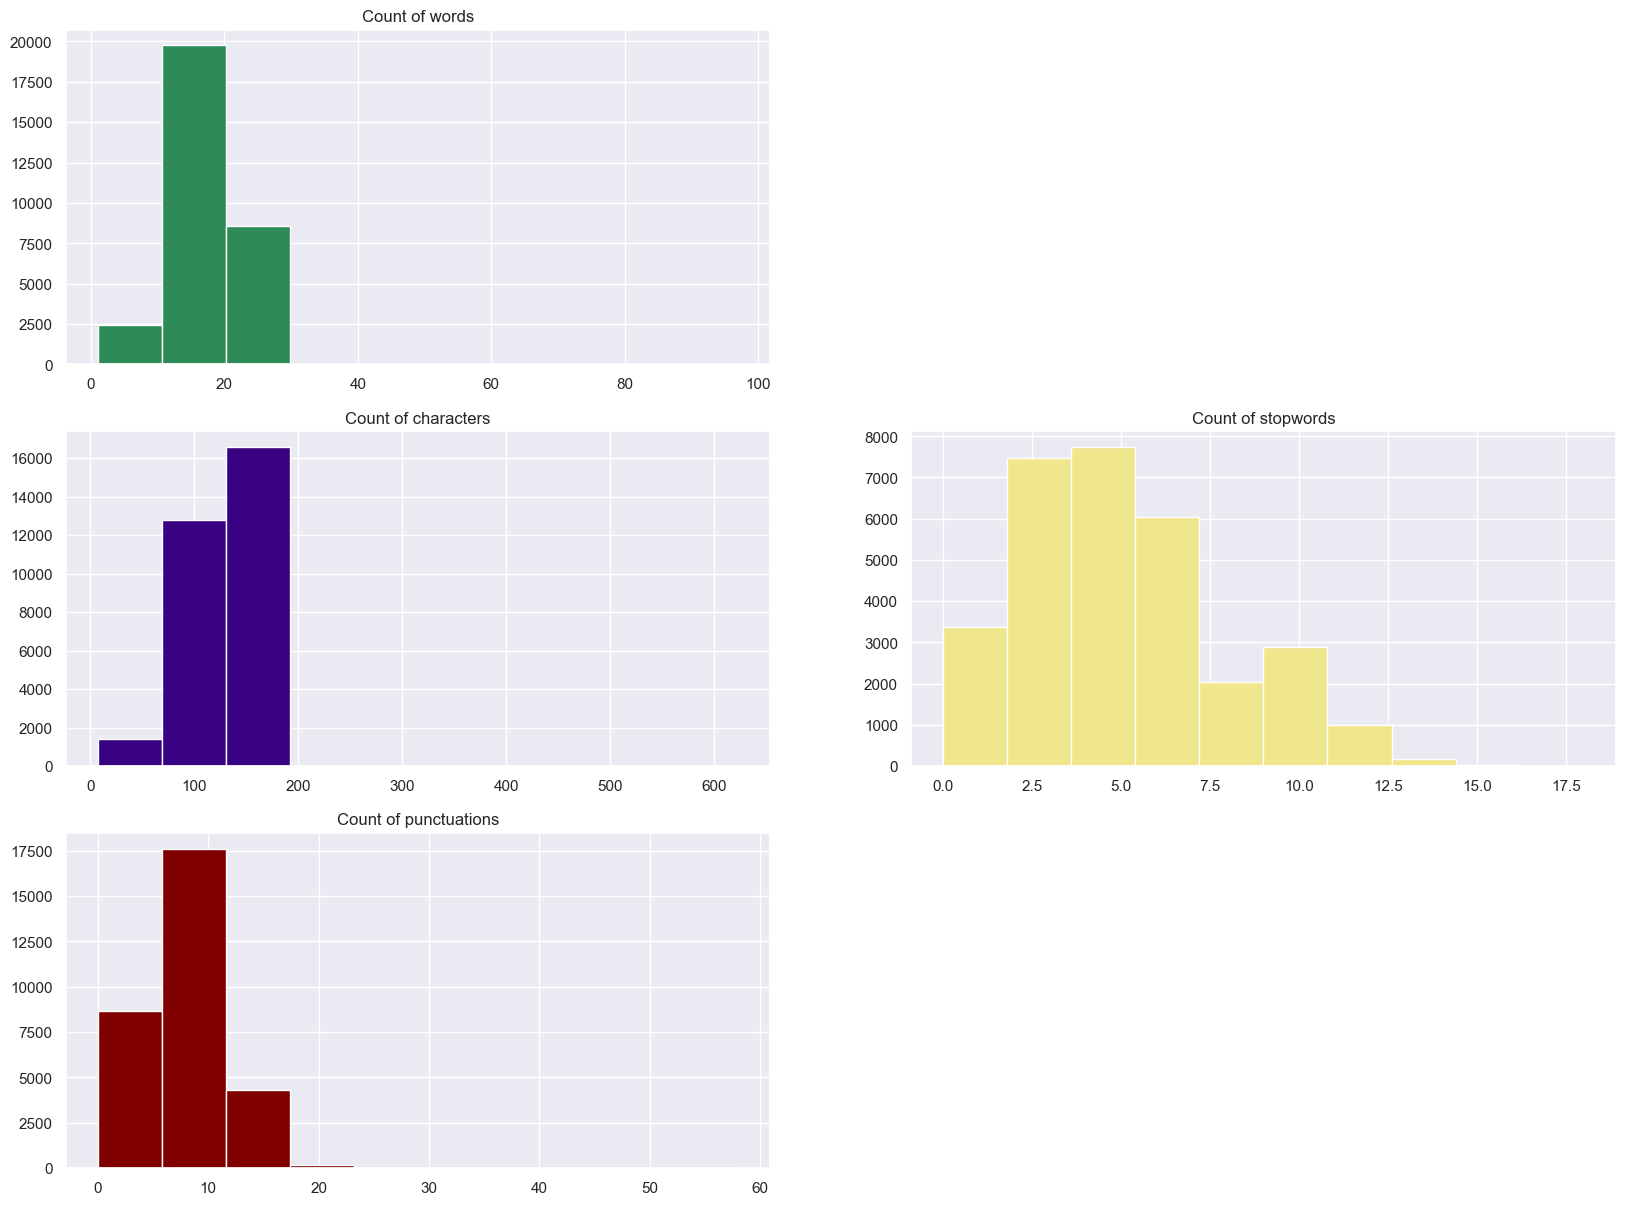

In [27]:
# creating features for the plots
num_of_words = train['num_of_words']
num_of_char = train['num_of_char']
stopwords = train['stopwords']
punctuations = train['punctuations']


plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
plt.hist(num_of_words,color='#2E8B57')
plt.title('Count of words')


plt.subplot(4,2,3)
plt.hist(num_of_char,color='#380282')
plt.title('Count of characters')

num_of_char
plt.subplot(4,2,4)
plt.hist(stopwords, color='#F0E68C')
plt.title('Count of stopwords')

plt.subplot(4,2,5)
plt.hist(punctuations, color='#800000')
plt.title('Count of punctuations')


plt.show()

The histograms presented above align with the descriptive statistics summaries conducted earlier, validating the distribution of the data. The visibly noticeable high negative skewness of the num_of_char feature is consistent with the statistical analysis. Similarly, the remaining features exhibit fairly symmetrical distributions, as indicated by the histograms.

#### Box Plots

<b> (1) Count of Words

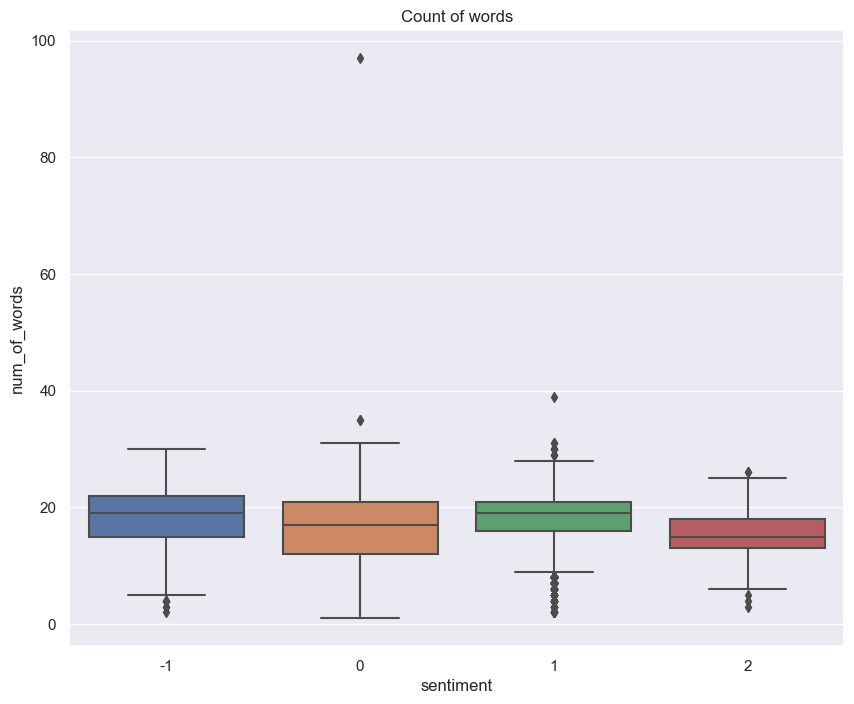

In [28]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='num_of_words', data=train).set(title='Count of words')
plt.show()

<b> (2) Count of Characters

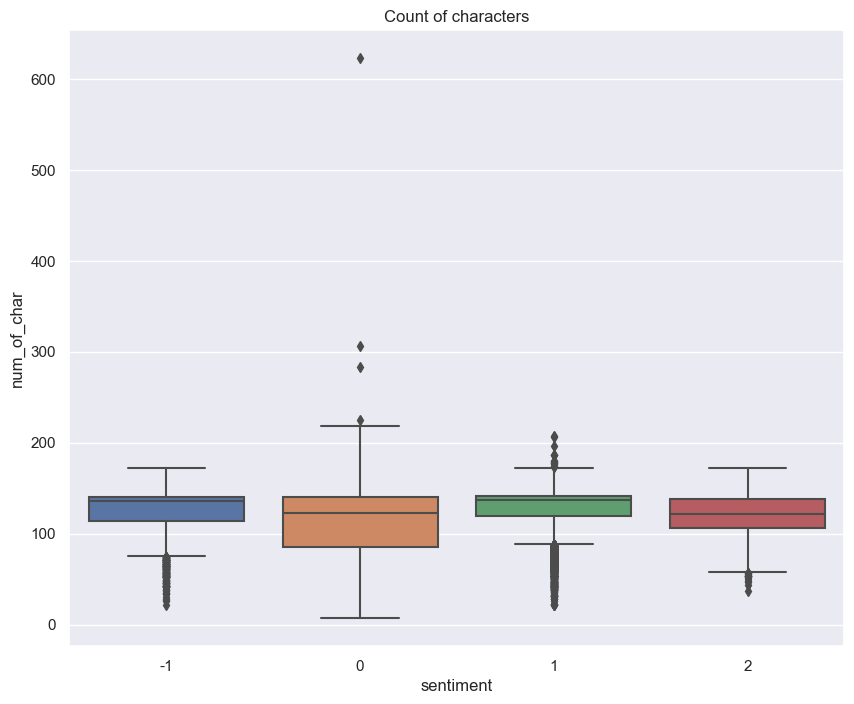

In [29]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='num_of_char', data=train).set(title='Count of characters')
plt.show()

<b> (3) Count of Stopwords

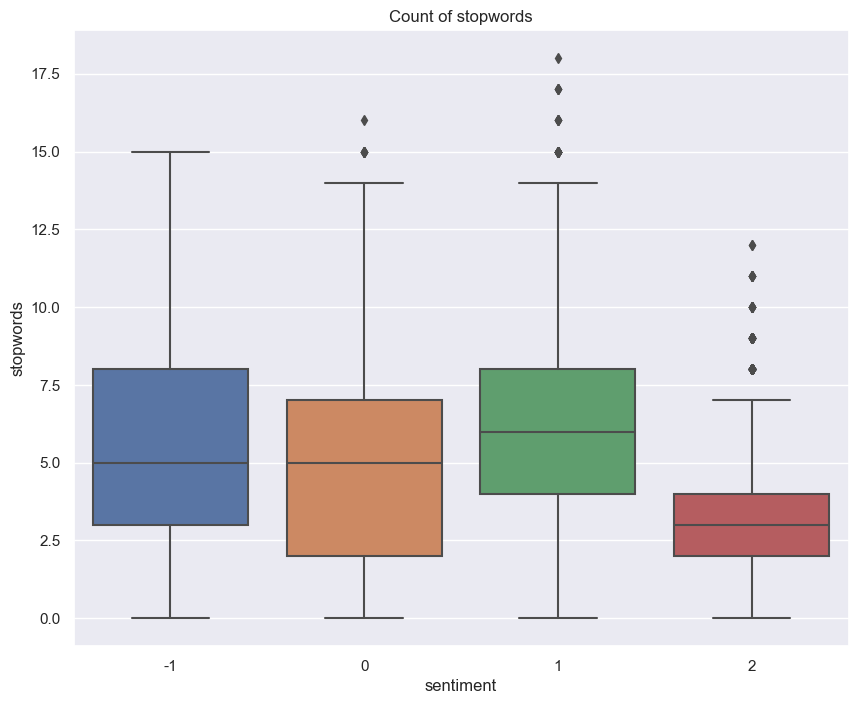

In [30]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='stopwords', data=train).set(title='Count of stopwords')
plt.show()

<b> (4) Count of Punctuations

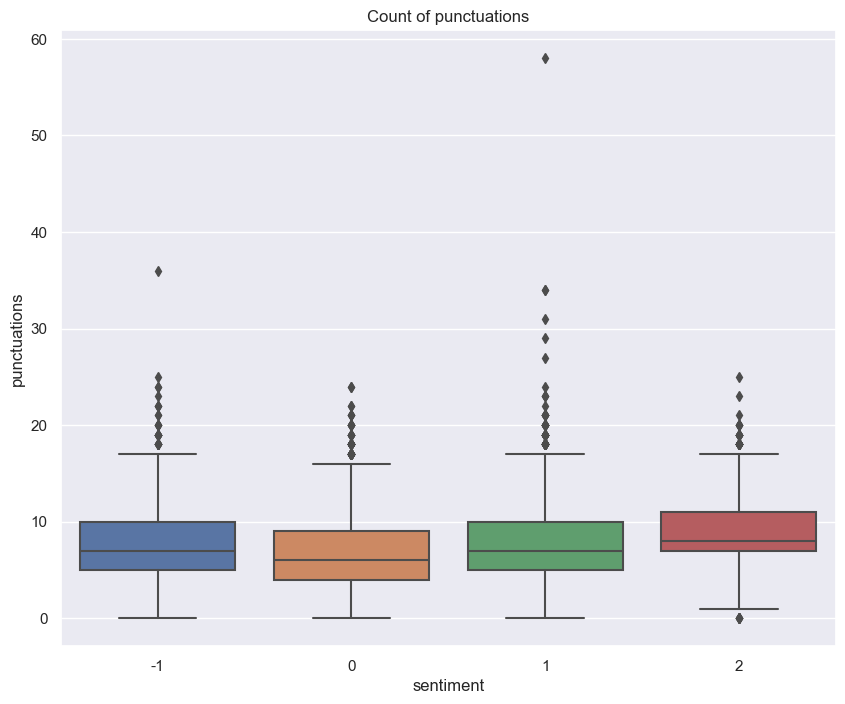

In [31]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='punctuations', data=train).set(title='Count of punctuations')
plt.show()

A moderate variation in word count was observed among the four classes, with the 'pro' class having the highest count, followed by the 'anti' class. The 'neutral' class exhibited a wider range for the variable and the lowest first quartile (Q1) score.

This trend is consistent with the observations in the number of words. When analyzing the box plots for the count of stopwords, a similar pattern was observed as in the count of words. The resemblance between these two plots suggests a potential correlation between these two features.

In the count of punctuation plot, the 'news' class had higher counts compared to other classes, although it had slightly lower third quartile (Q3) values than the 'neutral' class. The 'neutral' class, on the other hand, had a lower count but a larger range.

Considering the challenges in distinguishing the highest Q3 or Q1 scores across multiple classes, it is recommended to present these findings using bar plots for each specific attribute. Bar charts are effective in comparing distinct sets or classes of data among different groups. They depict the relationship using two axes, with categories on one axis and discrete values on the other. These charts can reveal significant changes in data over time or across different categories.

#### Bar Plots

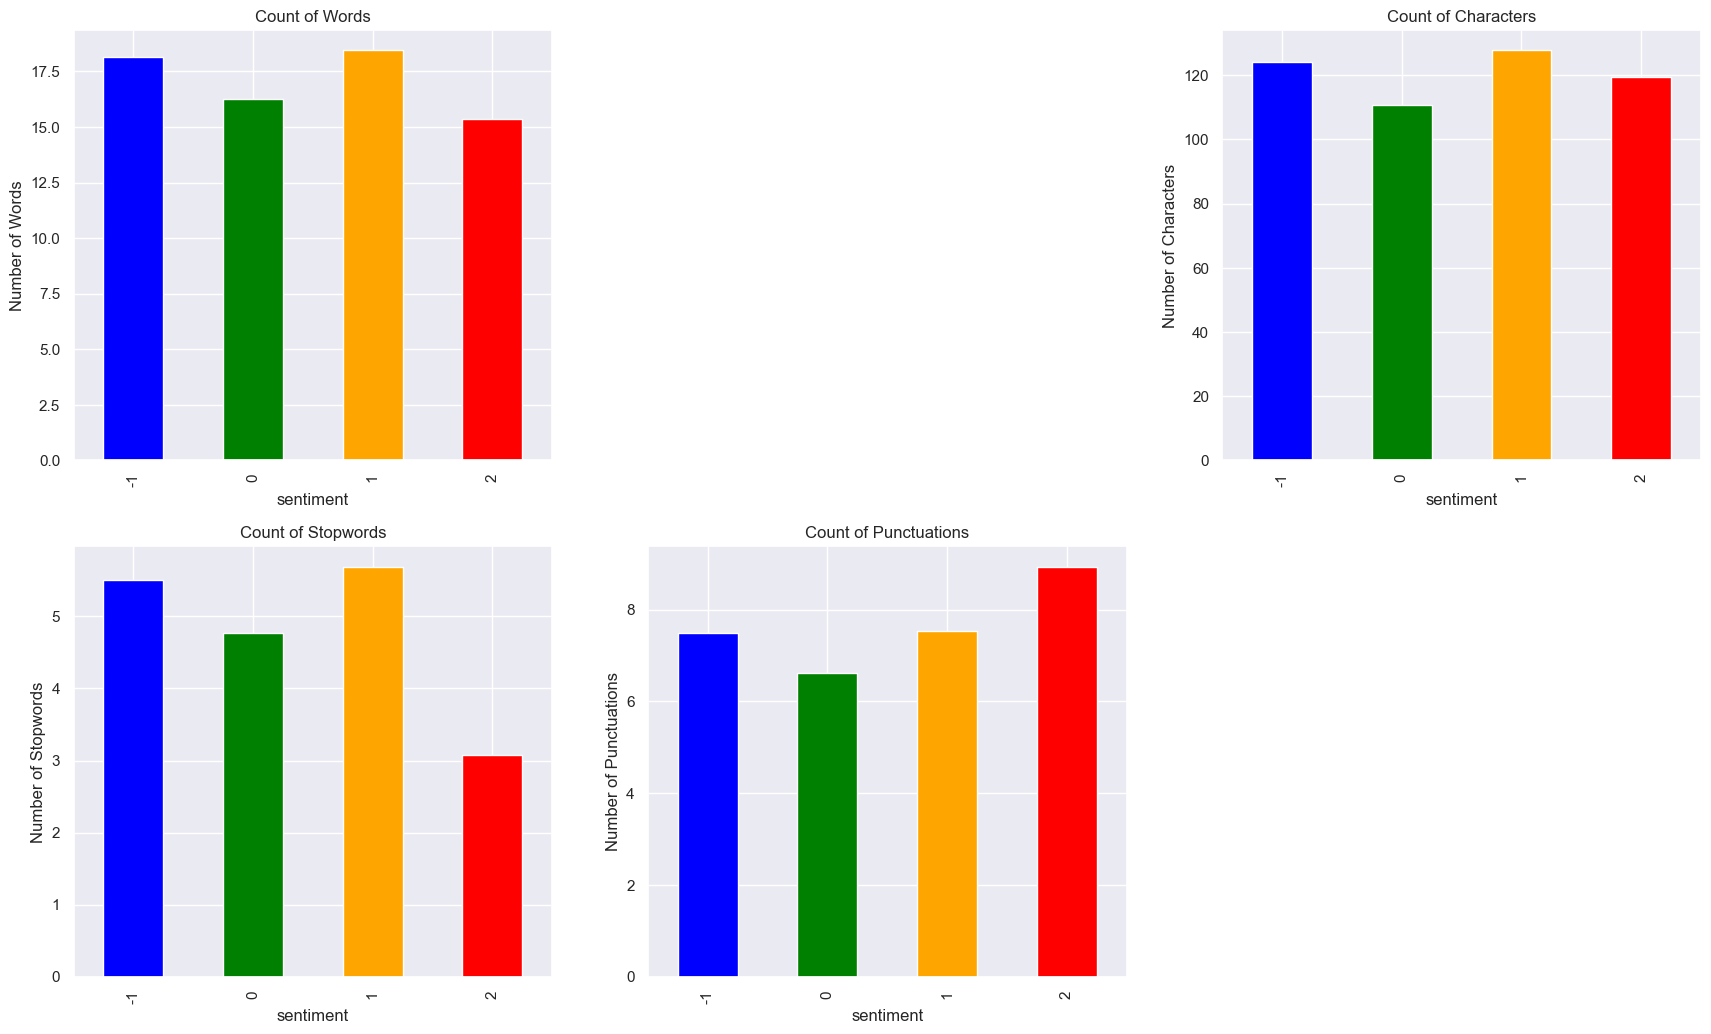

In [32]:
# Set the figure size
plt.figure(figsize=(21, 19))

# Define unique colors for each sentiment class
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar graph for each of the numerical columns
plt.subplot(3, 3, 1)
train.groupby('sentiment').num_of_words.mean().plot(kind='bar', color=colors)
plt.title('Count of Words')
plt.ylabel('Number of Words')

plt.subplot(3, 3, 3)
train.groupby('sentiment').num_of_char.mean().plot(kind='bar', color=colors)
plt.title('Count of Characters')
plt.ylabel('Number of Characters')

plt.subplot(3, 3, 4)
train.groupby('sentiment').stopwords.mean().plot(kind='bar', color=colors)
plt.title('Count of Stopwords')
plt.ylabel('Number of Stopwords')

plt.subplot(3, 3, 5)
train.groupby('sentiment').punctuations.mean().plot(kind='bar', color=colors)
plt.title('Count of Punctuations')
plt.ylabel('Number of Punctuations')

plt.show()

The analysis revealed that the 'pro' class exhibited higher counts in four features: word count, character count, stopword count, and punctuation count. Similarly, the 'anti' class displayed a similar pattern, albeit with slightly lower counts compared to the 'pro' class. This suggests that both classes have tweet messages of approximately similar length, with slight variations in these two attributes.

Furthermore, the 'pro' class demonstrated lower punctuation counts compared to the 'news' class, as well as lower counts of title case and average word length compared to the 'against' and 'news' classes. This finding might be attributed to the 'pro' class tweets being more varied in length and containing more opinionated content compared to the other classes.

In three features, the 'neutral' class had lower counts than the 'against' and 'pro' classes, but higher counts compared to the 'news' class (word count, stopword count). However, the 'neutral' class exhibited the lowest counts in four aspects, although the counts were consistently lower than those of the 'against' and 'pro' classes.

Regarding punctuation count, the 'news' class displayed higher counts than the other classes. This observation suggests that despite having the lowest number of words and unique words, the 'news' class had a higher number of punctuations. This pattern might be associated with tweets that solely relay news information without significant opinionated content.

### Multivariate Analysis: Non-Graphical 

This analysis facilitates the examination of the relationship between two numerical features by calculating the correlation coefficient. Correlation serves as a measure of the extent to which two variables change together, if at all. A strong positive correlation indicates that as one feature's value increases, the value of the other feature also tends to increase, and vice versa. There are three commonly used correlation measures:

Pearson's correlation
Spearman rank correlation
Kendall correlation
For this project, Pearson's correlation was employed for analysis. Pearson's correlation measures the linear relationship between features and assumes that the features follow a normal distribution. The table below provides an explanation of the interpretation of Pearson's correlation measure:

|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 

In [33]:
train.corr()

,sentiment,tweetid,num_of_words,num_of_char,stopwords,punctuations
sentiment,1.000000,-0.013503,-0.095641,0.055308,-0.188547,0.159219
tweetid,-0.013503,1.000000,0.068685,0.028572,0.086657,-0.131806
num_of_words,-0.095641,0.068685,1.000000,0.807941,0.753349,-0.065916
num_of_char,0.055308,0.028572,0.807941,1.000000,0.426769,0.321582
stopwords,-0.188547,0.086657,0.753349,0.426769,1.000000,-0.270877
punctuations,0.159219,-0.131806,-0.065916,0.321582,-0.270877,1.000000


During the analysis, several features were found to exhibit moderate positive correlations. Specifically, the following features displayed such correlations:

Number of characters and number of words
Stopwords count and number of words
These positive correlations provided additional insights into the tweet data analyzed in this project, and they align with expectations. As mentioned earlier, positive correlation indicates that as one feature increases, the correlated feature also tends to increase. In this case, the increased number of words corresponded to an increased number of characters and stopwords. This observation supports the understanding that longer tweets are likely to have more characters and potentially include more stopwords.

### Multivariate Analysis: Graphical

- This project considered only the heatmap for multivariate analysis.

  
Heat maps are visual representations that use color-coded cells to display the magnitude or intensity of a variable. They help identify patterns and relationships in large datasets. Heat maps are useful for exploring data, analyzing correlations, comparing categories, and supporting decision-making. They use a gradient color scheme to represent lower and higher values. 

#### Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

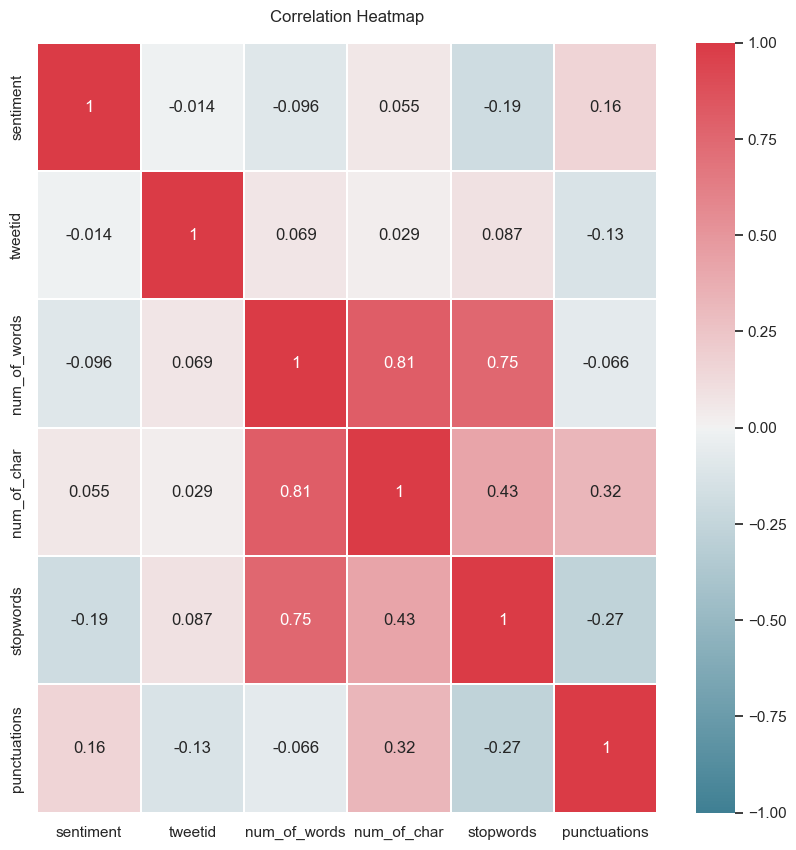

In [34]:
# specifying the size of the heatmap
fig, ax = plt.subplots(figsize=(10, 10))

# creating the heatmap with a custom color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # specify the color palette
heatmap = sns.heatmap(train.corr(), linewidths=.3, vmin=-1, vmax=1, annot=True, cmap=cmap)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15)


## Word Cloud
#### Words frequently used in the tweet

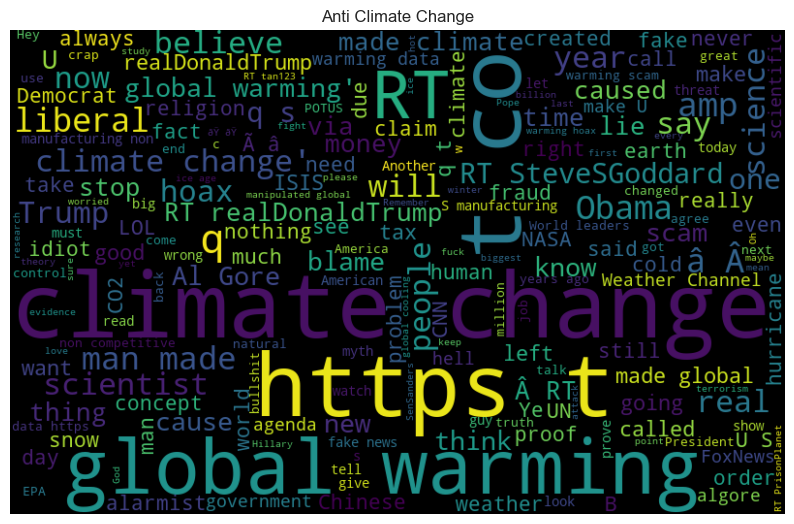

In [35]:
# importing wordcloud
from wordcloud import WordCloud

# checking the normal words used by Anti climate change messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'black',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Anti Climate Change')
plt.show()

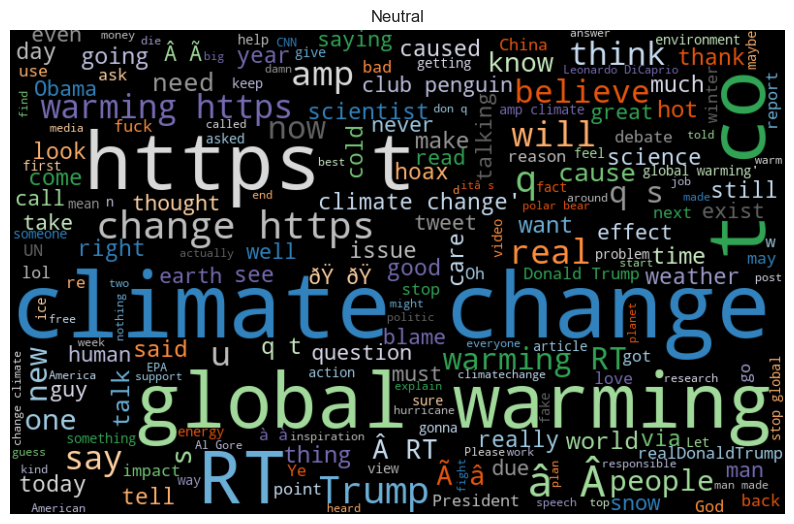

In [36]:
# checking the normal words used by Neutral messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 0]])

wordcloud = WordCloud(colormap='tab20c',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

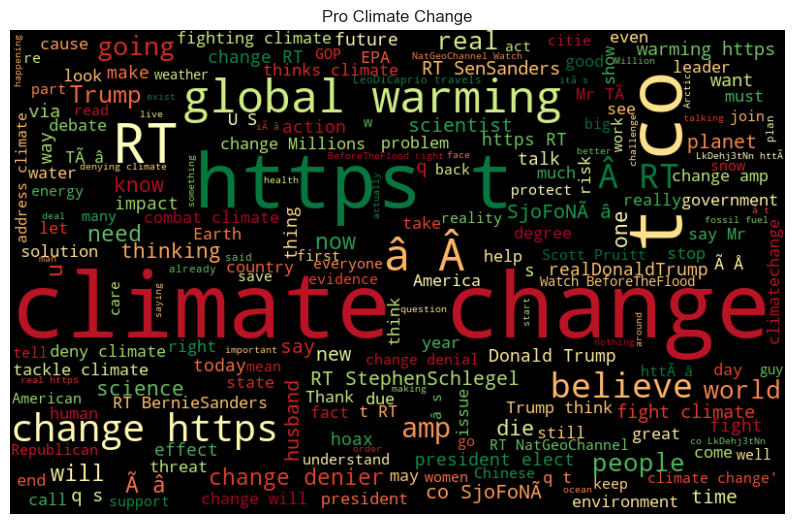

In [37]:
# checking the normal words used by Pro Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 1]])

wordcloud = WordCloud(colormap='RdYlGn',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Pro Climate Change')
plt.show()

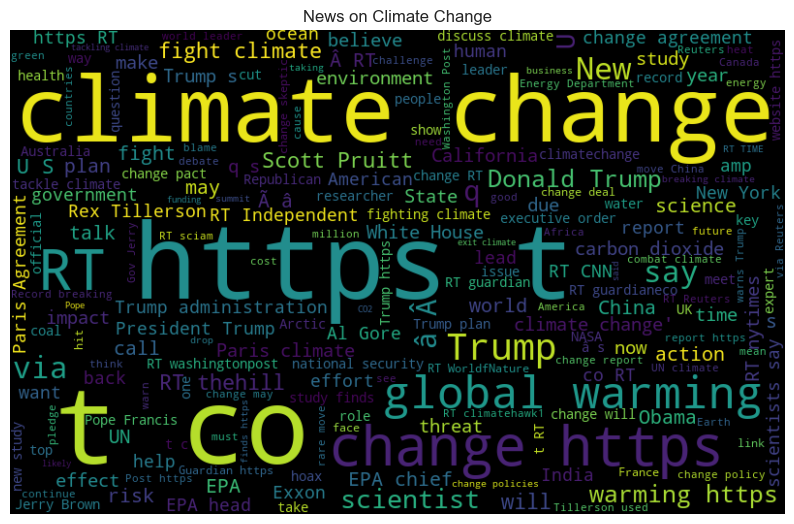

In [38]:
# checking the normal words used by News on Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('News on Climate Change')
plt.show()

## 4. Data Engineering

Data engineering is a crucial component of data science that focuses on the collection, preparation, and transformation of data to create reliable, accessible, and efficient data pipelines. It involves the design, development, and maintenance of systems and processes that enable data scientists and analysts to work with large volumes of data effectively.

Data engineering tasks typically include:

Data Cleaning and Preprocessing: Cleaning and transforming raw data to remove inconsistencies, handle missing values, and standardize formats. This step ensures that the data is ready for analysis and modeling.

Data Transformation: Applying various operations, such as aggregation, filtering, or feature engineering, to transform the data into a format suitable for analysis or modeling.

Data engineering focuses on the technical aspects of data management and preparation, aiming to provide clean, well-structured, and reliable data to data scientists and other stakeholders. It plays a crucial role in enabling data-driven decision-making and ensuring that data scientists can work with high-quality data efficiently.

## 5. Data Pre-processing
The following measures will be carried out:
1. data cleaning
2. remove stopwords
3. tokenisation
4. lemmatisation

#### 5.1 Data cleaning/Noise removal

Text analytics relies on the elimination of noise, which refers to unnecessary information, to ensure data is presented in a usable format. This step is crucial in eliminating text and characters that do not contribute to the analysis. Examples of such irrelevant elements include URLs, non-essential items like hyphens or special characters, web scraping, HTML, and CSS information. While some techniques are commonly employed, our unique dataset demands innovative thinking on our part to effectively remove noise.


The noise removal phase consists of the following steps:

 -  Transforming all text to lower case
 -  Removing web-urls, colons, @, #, etc.
 -  Remoivng punctuation
 -  Removing printables

In [39]:
# function to remove noise
def text_cleaner(df):
    # Lower the text
    df['message'] = df['message'].str.lower()
    
    # Remove web-urls
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ' '
    df['message'] = df['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)
    
     # Remove text with colons
    df['message'] = df['message'].replace(r'^.+:', '', regex=True)
    
    # Remove words starting with @
    pattern = r'@\w+'
    subs = ''
    df['message'] = df['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)
    
    # Remove words starting with #
    patt = r'#\w+'
    sub = ''
    df['message'] = df['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)
    
    # Remove printables
    df['message'] = df['message'].apply(lambda x: ''.join(["" if  i not in set(printable) 
                                                           else i for i in x]))

    return df

In [40]:
train = text_cleaner(train)
train.head()

,sentiment,message,tweetid,num_of_words,num_of_char,stopwords,punctuations
0,-1,funny as hell! canada demands 'gender rights'...,897853122080407553,21,135,5,7
1,-1,all the biggest lies about climate change and ...,925046776553529344,16,122,5,5
2,-1,the coming revelation of the $q$global warming...,696354236850786305,17,141,3,15
3,-1,it won't),846806509732483072,21,140,5,13
4,-1,obama has no control over the climate. he is ...,628085266293653504,19,128,8,9


In [41]:
test = text_cleaner(test)
test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,;..,224985
3,\nputin got to you too jill ! \ntrump does...,476263
4,'female orgasms cause global warming!'\n-sarc...,872928


In [42]:
#creating a function that removes punctuation from the data frame
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [43]:
# removing punctuation from the train data 
train['message'] = train['message'].apply(remove_punctuation)

In [44]:
train.head()

,sentiment,message,tweetid,num_of_words,num_of_char,stopwords,punctuations
0,-1,funny as hell canada demands gender rights an...,897853122080407553,21,135,5,7
1,-1,all the biggest lies about climate change and ...,925046776553529344,16,122,5,5
2,-1,the coming revelation of the qglobal warmingq ...,696354236850786305,17,141,3,15
3,-1,it wont,846806509732483072,21,140,5,13
4,-1,obama has no control over the climate he is t...,628085266293653504,19,128,8,9


In [45]:
# removing punctuation from the test data 
test['message'] = test['message'].apply(remove_punctuation)

In [46]:
test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,,224985
3,\nputin got to you too jill \ntrump doesn...,476263
4,female orgasms cause global warming\nsarcasti...,872928


#### 5.5. Removal of stop words, tokenisation and lemmatisation

Now with all the necessary noise removal functions applied to the text data successfully, the nest step was to separate the text sentences into separate tokens, lemmas and remove any stop words from it. A single function that can perform all the three tasks was written and employed;

In [47]:
# Function for tokenization, lemmatization and removing stopwords
def tokenize_lemmatize_stopwords(df):
    
    # importing TreebankWordTokenizer
    from nltk.tokenize import TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()

    # importing WordNetLemmatizer
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    #import stopwords
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
   
    #tokenize
    df['message'] = df['message'].apply(tokenizer.tokenize)

    # lemmatize
    df['message'] = df['message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # remove stopwords
    df['message'] = df['message'].apply(lambda x: [word for word in x 
                                                   if word not in stop_words])

    return df


In [48]:
# appling the tokenize_lemmatize_stopwords function to the train data
train = tokenize_lemmatize_stopwords(train)

In [49]:
train.head()

,sentiment,message,tweetid,num_of_words,num_of_char,stopwords,punctuations
0,-1,"[funny, hell, canada, demand, gender, right, c...",897853122080407553,21,135,5,7
1,-1,"[biggest, lie, climate, change, global, warmin...",925046776553529344,16,122,5,5
2,-1,"[coming, revelation, qglobal, warmingq, resemb...",696354236850786305,17,141,3,15
3,-1,[wont],846806509732483072,21,140,5,13
4,-1,"[obama, ha, control, climate, worst, snake, oi...",628085266293653504,19,128,8,9


In [50]:
# appling the tokenize_lemmatize_stopwords function to the test data
test = tokenize_lemmatize_stopwords(test)
test.head()

,message,tweetid
0,"[europe, looking, china, make, sure, alone, fi...",169760
1,"[combine, polling, staffer, climate, change, w...",35326
2,[],224985
3,"[putin, got, jill, trump, doesnt, believe, cli...",476263
4,"[female, orgasm, cause, global, warming, sarca...",872928


NOTE: The text data has now been cleaned, tokenized and lemmatized after which the text tokens 
      were then converted to corpus. This is an important step that removes all the delimiters 
      before vectorization.

#### Conversion to Corpus

In [51]:
# Corpus function
def convert_to_corpus(data, col):
    def operation(word_list):
        string = ' '.join(word_list)
        return string
    
    df = data.copy()
    df[col] = df[col].apply(operation)
    
    return df

In [52]:
# apply corpus function to train data
train = convert_to_corpus(train, 'message')
train.head()

,sentiment,message,tweetid,num_of_words,num_of_char,stopwords,punctuations
0,-1,funny hell canada demand gender right climate ...,897853122080407553,21,135,5,7
1,-1,biggest lie climate change global warming debu...,925046776553529344,16,122,5,5
2,-1,coming revelation qglobal warmingq resembles l...,696354236850786305,17,141,3,15
3,-1,wont,846806509732483072,21,140,5,13
4,-1,obama ha control climate worst snake oil sales...,628085266293653504,19,128,8,9


In [53]:
# apply courpus function to test data
test = convert_to_corpus(test, 'message')
test.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,female orgasm cause global warming sarcastic r...,872928


### Text Feature Extraction

Feature extraction from text, also known as text vectorization, involves converting raw text data into numerical features that can be processed by machine learning algorithms. This process preserves the information in the original text while reducing redundant data, resulting in more efficient and effective machine learning models.

The bag-of-words (BoW) model is a commonly used technique in text feature extraction. It represents text as a collection of words, disregarding grammar and word order. This model is widely applied in various NLP tasks, including text classification, sentiment analysis, and topic modeling.

In this project, the BoW model will be employed to extract features from text data, enabling further analysis and modeling of the text-based information.

### Bag of Words Model

In [54]:
# Create bag of words with max features of 2500, ngram range of (1, 4).
cv = CountVectorizer(max_features=2500, ngram_range=(1, 4))
X = cv.fit_transform(train["message"]).toarray()
Y = train["sentiment"]


# creating bag of words for the test data
x_test_data = cv.fit_transform(test["message"]).toarray()

- Now that bags of words have been successfully created in both train and test dataset, next step is to compute the IDF values by calling tfidf_transformer.fit(x) on the word counts we computed earlier. 

#### TF-IDF Feature Extraction 

TF-IDF is a technique for extracting features from text documents. It calculates the importance of words by considering both their frequency within a document (Term Frequency) and their rarity across the entire corpus (Inverse Document Frequency). TF-IDF assigns higher scores to words that are important within a document but less common across the corpus. This feature extraction process enables text documents to be represented as numerical vectors, where each element corresponds to the TF-IDF score of a word. This representation helps in tasks like document classification, information retrieval, and text clustering.

In [55]:
# importing TF-IDF transformer
from sklearn.feature_extraction.text import TfidfTransformer 

# for the train data
tfidf = TfidfTransformer(smooth_idf=True,use_idf=True) 

# Transform x values using TF-IDF transformer
X = tfidf.fit_transform(X)


# Transform x_test_data values using TF-IDF transformer
x_test_data = tfidf.fit_transform(x_test_data)

Once the IDF values are computed, it is important to address data imbalance. The exploratory data analysis revealed an imbalance among the four classes, with the 'pro' class having significantly more data compared to the others. Balancing the dataset is crucial for achieving accurate models, higher balanced accuracy, and improved detection rates. A balanced dataset helps prevent model bias towards a specific class and is essential for effective classification. 

There are various approaches to tackle imbalanced data, including undersampling, oversampling, and the Synthetic Minority Oversampling Technique (SMOTE). SMOTE is a widely used method that generates synthetic instances to balance class distribution by replicating minority class examples. In this project, SMOTE was employed as the balancing technique.

### Data Balancing

In [56]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# Define SMOTE-Tomek Links
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = resample.fit_resample(X, Y)

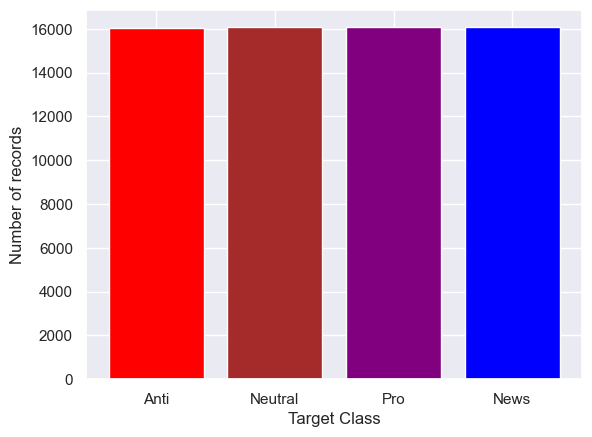

In [57]:
# balancing the classes
# isolating all the classes in the y column 
Anti = y[y == -1]
Neutral = y[y == 0]
Pro = y[y== 1]
News = y[y== 2]

# plotting the total sentiment features on a bar graph
labels = y.unique()
heights = [len(Anti),len(Neutral), len(Pro), len(News)]
plt.bar(labels, heights, color=['red','brown','purple','blue'])
plt.xticks(labels,['Anti','Neutral', 'Pro', 'News'])
plt.ylabel("Number of records")
plt.xlabel('Target Class')
plt.show()

The figure showed an evenly distributed dataset in contrast to the starting data sample shown in the EDA section. Next step was to scale the data by standardization as a way of handling the outliers if any.

#### Data Splitting

In [58]:
# spliting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size = 0.20, random_state = 42)

print(x_train.shape)  
print(x_test.shape) 
print(y_train.shape)  
print(y_test.shape)  

(51420, 2500)
(12855, 2500)
(51420,)
(12855,)


After successfully splitting the data into training and testing datasets, the subsequent task involved experimenting with class weights.

In the process of constructing a machine learning model, specifying class weights in the original dataset serves as an alternative approach to the previously employed balancing method. This allows the algorithm to assign greater importance to minority classes. The calculation of class weights can be achieved using the class_weight() function from the sklearn.utils library.

#### Class Weights 

In [59]:
# computing the class wieght of the data sklearn.utils.class_weight
classes = np.unique(y_train)
cw = compute_class_weight(class_weight= 'balanced',
                          classes = np.unique(y_train),
                          y = y_train)
weights = dict(zip(classes, cw))
weights


{-1: 1.001714330242344,
 0: 0.9975942883749807,
 1: 0.9956626132755015,
 2: 1.0050820953870212}

It is now straightforward to supply the class weights as input to a classifier, such as a DecisionTreeClassifier, and evaluate the model's performance.

With the data transformed into a format that is compatible with machine learning models, specifically prepared for training, the subsequent phase involved the training of multiple models.

## 7. Modelling

To make predictions for the target variable, sentiment, we will create five regression models in the listed order:

**Logistic Regression** serves as the foundational model, utilizing a logistic function to model the dependent variable.

**KNeighbors Classifier** operates by calculating distances between a query and all examples in the data, selecting the specified number of closest examples (K), and making predictions based on the most frequent label (classification) or label averaging (regression).

**Decision Tree Classifier** partitions data into subsets through recursive binary splitting, aiming to minimize Mean Square Error.

**Random Forest Classifier** is an ensemble bagging model based on decision trees. It trains on different subsets of the data to reduce variance error.

All models will follow the same procedure, consisting of:

1. Creating a classifier model object.
2. Fitting the model to the training dataset.
3. Making predictions using the validation dataset.

### Logistic Regression

f1 score : 0.6890704006223259
[[2591  375  160   97]
 [ 581 1907  411  288]
 [ 401  398 1967  396]
 [ 388  219  283 2393]]


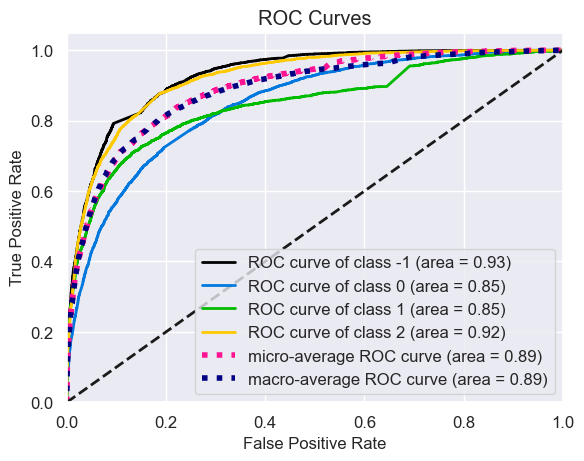

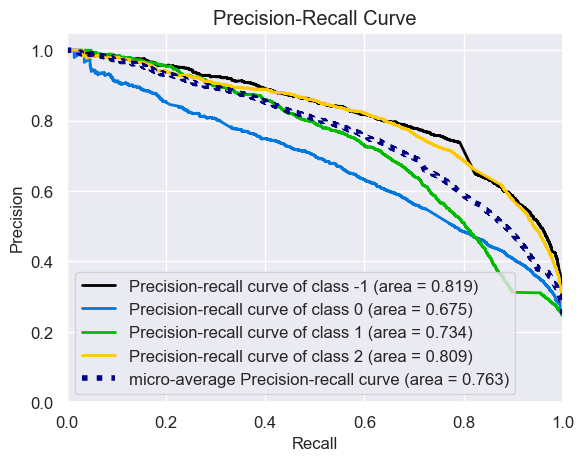

In [60]:
# training and testimg Logistic Regression model on the data
lgr = LogisticRegression(C= 100, class_weight = weights, multi_class='ovr')
lgr.fit(x_train, y_train)

y_score = lgr.predict_proba(x_test)
y_pred_lr = lgr.predict(x_test)


# calculating the f1 score for the x_test set
Log_classifier  = f1_score(y_test, y_pred_lr,
                            pos_label='positive',
                             average='micro')
    
print("f1 score :", Log_classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()



After training the Logistic Regression model on the data, it exhibited a satisfactory predictive capability, as indicated by its F1 mean score value. The next step in the analysis involved applying the KNeighors Classifier.

#### KNeighbors Classifier 

f1 score : 0.7169972773239984
[[2968  103    3  149]
 [ 360 2489   49  289]
 [ 586  873  890  813]
 [ 180  194   39 2870]]


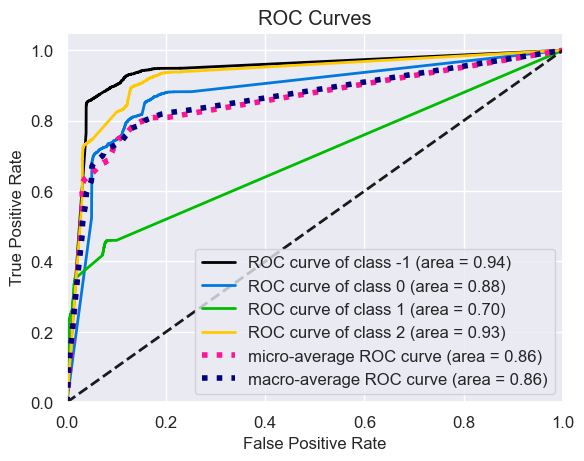

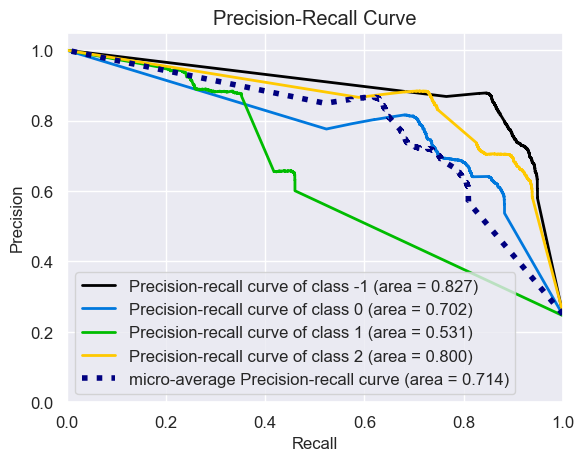

In [61]:
# training, testing and visualizing the data using KNeighborsClassifier

knc = KNeighborsClassifier(weights='distance', n_neighbors = 3)
knc.fit(x_train, y_train)

y_score = knc.predict_proba(x_test)
y_pred_kn = knc.predict(x_test)

# calculating the f1 score for the x_test set
KNeigh_Classifier = f1_score(y_test, y_pred_kn,
                            pos_label='positive',
                             average='micro')

print("f1 score :", KNeigh_Classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_kn)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

Despite the slightly better performance of the KNeighbors Classifier compared to Logistic Regression, the mean F1 score obtained from this model indicates a relatively good ability to predict the sentiment class. However, to further enhance the predictive capabilities, additional models were explored.

#### Decision Tree Classifier

f1 score : 0.6764683002722676
[[2387  382  319  135]
 [ 328 1961  632  266]
 [ 213  435 2091  423]
 [ 164  286  576 2257]]


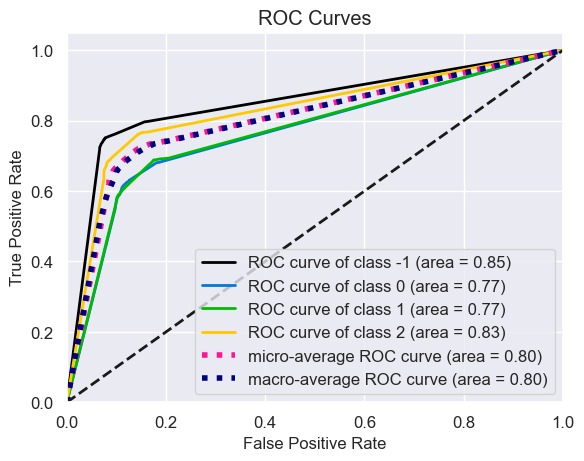

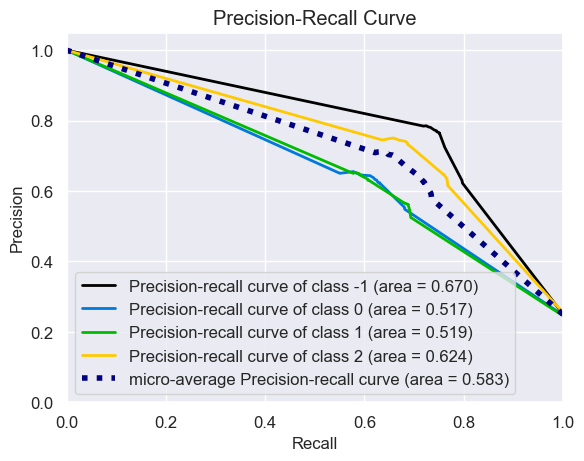

In [62]:
# training, testing and visualizing the data using DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_split= 4, class_weight=weights)
dtc.fit(x_train, y_train)

y_score = dtc.predict_proba(x_test)
y_pred_dtc = dtc.predict(x_test)

# calculating the f1 score for the x_test set
Dec_tree_classifier = f1_score(y_test, y_pred_dtc,
                            pos_label='positive',
                             average='micro')

print("f1 score :", Dec_tree_classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

#### Random Forest Classifier

f1 score : 0.7513807856865033
[[2685  245  239   54]
 [ 236 2216  568  167]
 [ 136  368 2281  377]
 [ 107  214  485 2477]]


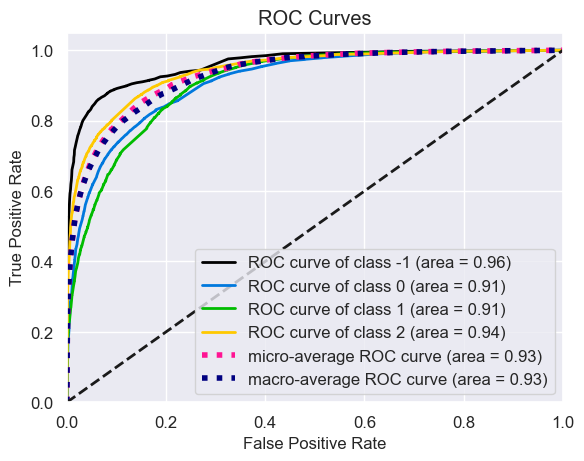

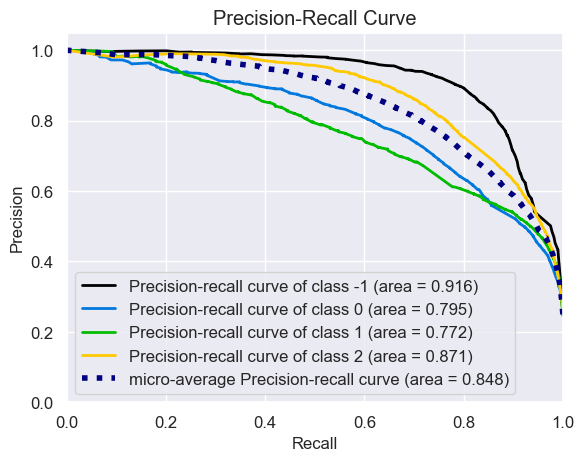

In [63]:
# training, testing and visualizing the data using RandomForestClassifier

rf = RandomForestClassifier(class_weight = weights, n_estimators=79)
rf.fit(x_train, y_train)

y_score = rf.predict_proba(x_test)
y_pred_rf = rf.predict(x_test)


# calculating the f1 score for the x_test set
RF_Classifier = f1_score(y_test, y_pred_rf,
                            pos_label='positive',
                             average='micro')

print("f1 score :", RF_Classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

- The Random Forest classifier gave a relatively better results than other models previously considered.

### Pickle files

In [79]:
import pickle 

#Logistic regression model 
with open('lgr.pkl', 'wb' ) as file:
    pickle.dump(lgr, file)

In [82]:
# KNeighbors Classifier 
with open('knc.pkl', 'wb' ) as file:
    pickle.dump(knc, file)

In [86]:
# Decision Tree Classifier 
with open('dtc.pkl', 'wb' ) as file:
    pickle.dump(dtc, file)

In [88]:
# Random Forest Classifier 
with open('rf.pkl', 'wb' ) as file:
    pickle.dump(rf, file)

In [78]:
# vectorizer
with open('count_vect.pkl', 'wb' ) as file:
    pickle.dump(cv, file)

## Model Performance

In [64]:
# Store the values in a dictionary
F1_score_all = {'logic regression': Log_classifier,
               'KNeighbour': KNeigh_Classifier,
                'decision tree': Dec_tree_classifier,
                  'random forest': RF_Classifier}

#Display the f1_score values
F1_score_all

{'logic regression': 0.6890704006223259,
 'KNeighbour': 0.7169972773239984,
 'decision tree': 0.6764683002722676,
 'random forest': 0.7513807856865033}

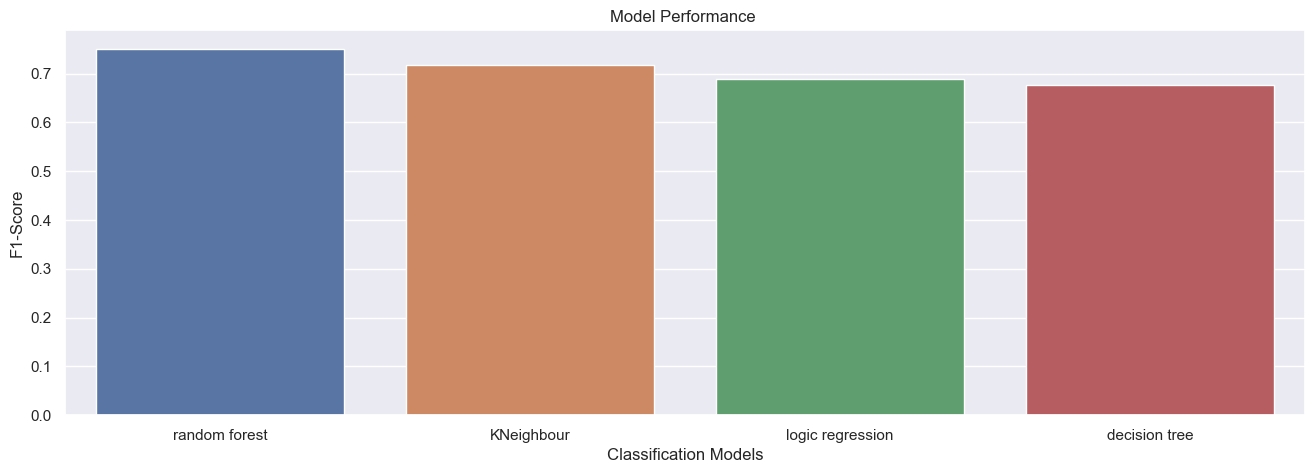

In [65]:
# generating a bar graph of F1 scores visualizing the best performing model.

c = pd.DataFrame({'Classification Models': list(F1_score_all.keys()),
                 'F1-Score': list(F1_score_all.values())})


# ploting the bar graph     
c = c.nlargest(columns='F1-Score', n = 5) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=c, x= "Classification Models", y = 'F1-Score')
ax.set(ylabel = 'F1-Score')
plt.title("Model Performance ")
plt.show()

Based on the bar plot, the Support Vector Classifier (SVC) emerged as the top-performing model, achieving an F1-Score of over 80 percent. Although all the trained models exhibited good performance with relatively high mean F1-Scores, the SVC outperformed the others.

## Model Explanations

#### Logistic Regression Classifier

Logistic regression is a supervised learning classification algorithm used to estimate the probability of a binary target variable. It is commonly applied when the dependent variable has two possible classes, typically represented as 1 (indicating success/yes) or 0 (indicating failure/no). The logistic regression model predicts the probability of the target variable being 1 based on the input features (X). It is a straightforward machine learning algorithm utilized in diverse classification tasks, including spam detection, diabetes prediction, and cancer detection.

There are three types of logistic regression based on the number of categories in the target variable:

(a) Binary or Binomial: In this type, the target variable has only two possible categories, such as 1 and 0. It is used for classifying variables like success/failure, yes/no, or win/loss.

(b) Multinomial: In this type, the target variable can have three or more unordered categories without any quantitative significance. It is used for classifying variables like different types or classes, such as "Type A," "Type B," or "Type C."

(c) Ordinal: In this type, the target variable can have three or more ordered categories with quantitative significance. It is used for classifying variables with ordered levels, such as "poor," "good," "very good," and "excellent," where each category may have corresponding scores like 0, 1, 2, 3.

#### KNeighbors Classifier

The K-Nearest Neighbor (KNN) classifier is a supervised learning algorithm used for data classification. It estimates the probability of a data point belonging to a particular group based on the groups of its nearest neighbors. KNN assumes that data points close to each other are likely to belong to the same class. It is commonly used for classification problems and can also be applied to regression problems. KNN is a lazy learning algorithm as it doesn't perform training on the supplied data, but rather stores the data and builds a model when a query is made. This makes it suitable for data mining tasks.

#### Decision Tree Classifier

Decision Trees are versatile machine learning algorithms used for both classification and regression tasks. They are well-suited for handling non-linear data, although they can also handle linear data. Decision Trees derive a series of decisions from the data to make predictions or decisions. Unlike linear classifiers or regressors, Decision Trees are not limited by the linearity of the data. Boosting and Bagging algorithms have been developed as ensemble models, combining the power of Decision Trees with modifications to overcome their limitations and improve performance. One key advantage of Decision Trees is their interpretability, making them easy to understand and interpret. In classification, decisions are made based on conditions on features, with internal nodes representing the conditions and leaf nodes representing the final decisions. The same principles apply to regression tasks, albeit with different methodologies. The CART algorithm (Classification and Regression Trees) is commonly used in Decision Tree construction.

#### Random Forest Classifier

The Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to create a robust and accurate classification model. It is widely used for both classification and regression tasks in machine learning.

The Random Forest Classifier works by creating a collection of decision trees, where each tree is built using a random subset of features and training samples. During the training process, the algorithm generates different subsets of the original data through a technique called bootstrap aggregating or "bagging". This randomness and diversity in the decision trees help to reduce overfitting and improve the model's generalization ability.

When making predictions, each decision tree in the Random Forest independently classifies the input data, and the final prediction is determined by majority voting. This ensemble approach results in a more robust and accurate prediction compared to individual decision trees.

Random Forest Classifier offers several advantages. It can handle high-dimensional data and effectively capture complex relationships between features. It is resistant to overfitting and performs well even with noisy or missing data. Additionally, it provides measures of feature importance, allowing for feature selection and interpretation of the model.

The Random Forest Classifier has wide applications in various domains such as image classification, fraud detection, customer churn prediction, and bioinformatics. Its versatility, accuracy, and ability to handle large datasets make it a popular choice for many machine learning tasks.

## Conclusion

The goal of this project was to develop a robust classifier model to predict the sentiment of Twitter users regarding climate change based on their messages. The RR10 PRIME TECH team collected a substantial amount of Twitter data, performed data exploration, and diligently cleaned the dataset. As a result, we successfully built five different classifier models that could predict the sentiment of Twitter users with a high accuracy rate of 70-80%. This accomplishment led to the development of the RR10 PRIME CLASSIFIER app, which enables users to input text related to climate change and obtain the predicted sentiment or class label.

## Kaggle Model Submissions

#### Logistic Regression

In [66]:
# predicting the sentiment of the test data
lr_sentiment = lgr.predict(x_test_data )

In [67]:
# store predictions in a dataframe
sentiment = pd.DataFrame(lr_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
lr5_submission = tweetid.join(sentiment)

# write the result to a csv file
lr5_submission.to_csv('lr5_submission.csv', index = False)

### KNeighbors Classifier

In [68]:
# make predictions for  target variable sing original test data
knc_sentiment = knc.predict(x_test_data)

In [69]:
# training the model with the whole data
knc.fit(x, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [70]:
# store predictions in a dataframe
sentiment = pd.DataFrame(knc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
knc4_submission = tweetid.join(sentiment)

# write the result to a csv file
knc4_submission.to_csv('knc4_submission.csv', index = False)

#### Decision Tree Classifier

In [71]:
# predicting the tests data
dtc_sentiment = dtc.predict(x_test_data)

In [72]:
# store predictions in a dataframe
sentiment = pd.DataFrame(dtc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
dtc6_submission = tweetid.join(sentiment)

# write the result to a csv file
dtc6_submission.to_csv('knc6_submission.csv', index = False)

### Random Forest Classifier

In [73]:
# predicting the sentiment of the test_data
rf_sentiment = rf.predict(x_test_data)

In [74]:
# store predictions in a dataframe
sentiment = pd.DataFrame(rf_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
rf7_submission = tweetid.join(sentiment)

# write the result to a csv file
rf7_submission.to_csv('rf7_submission.csv', index = False)

## References

https://athena.explore-datascience.net/

https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669

https://towardsdatascience.com/from-raw-text-to-model-prediction-in-under-30-lines-of-python-32133d853407

https://builtin.com/data-science/random-forest-algorithm

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem

https://towardsdatascience.com/a-dive-into-decision-trees-a128923c9298

https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb